In this **worksheet** we will try to simulated two integrate and fire neurons. Most of the code will be supplied to you, but you will be asked to fill in some gaps and to look at what happens when some parameters are changed. We'll start by going back to the solving numerical equations bit we looked at before.

----


This code integrates the equation *df/dt = -f* for different values of *f*. Thing carefully about what the loop is doing! `f[t_index]` gives the `t_index`th entry in the list `f`, where zero is the first entry, this would correspond to the value of the function after `t_index` time steps, that is the value of the function at `t_index`_*delta_. The loop doesn't do anything to the first entry but all the other ones it replaces using the formula `f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])` which corresponds to the Euler approximation.

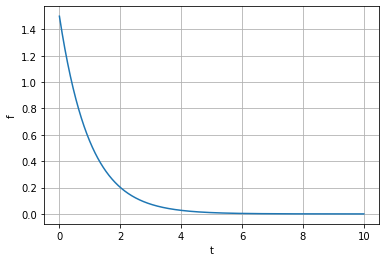

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def dfdt(f):
  return -f

t_start=0.0
t_end=10.0
n_points=1000

delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f = np.full_like(t, f0)

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])

plt.figure(figsize=(6, 4))
plt.plot(t, f)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()



The `f = np.full_like(t, f0)` just makes a list the same size as the `t` list but with the value `f0` for each entry.

Let's go through each line.

The first two lines define a function called `dfdt(f)`, you send it `f` and it send back the value `-f`, obviously this is a very simple sort of function and it would be easy just to write `-f` in the code directly, but doing it like this makes it easy to change the equation later on.

The next few lines just set up some values, again, it might seem silly to define `t_start` as `0.0`, you could just put the zero directly into the code, but it is a good habit to give things names and give them a value at the top of the programme, it makes it easy to change the programme later on.

Programming is always a battle between now-you and future-you, by doing things a little more carefully now, giving things names, defining functions, you inconvenience now-you a bit and save future-you a ton of trouble.

The next line just defines `delta`, the little bit of time we move forward in each step, if we want `n_points` steps then this is how big each step needs to be.

Now `t` is a vector of time values, so it will look like `[0.0,0.01,0.02,. . .]`

We set the start value of `f` as `f0=1.5` and then make a vector of that `[1.5,1.5,1.5, . . .]`, we are intending to change these values as we go along, it is just convenient to start of with a vector to store them in and this is an easy way to make it.

Now the next two lines are the business part of the programme, what programmers call _the inner loop_, the bit that does the work and takes all the time. For each value of `t_index` as `t_index` goes from 1 to `n_points` we set the `t_index`th value of the vector `f` according to the Euler approximation:
$$f(n\delta)=f((n-1)\delta)+\delta \frac{df}{dt}((n-1)\delta)$$

The last few lines just make the plot, it is 6in$\times$4in, Python plotting works in inches for some reason, we plot the vector `f` as the $y$-axis and the vector `t` as the $x$-axis and we label the axes and have a grid.
_______

In fact it is possible to write down the solution to _df/dt=-f_, it is

_f=f(0)_ exp _(-t)_

where the "exp" is the exponential, a well known mathematical function, in this code we compare the Euler approximation to the true function, in fact, the approximation is too good for _df/dt=-f_ for the error to be visible, so we look at _df/dt=f_ instead, this has

_f=f(0)_ exp _(t)_

as solution. The number of points has been decreased, making delta bigger, you can experiment with changing this.

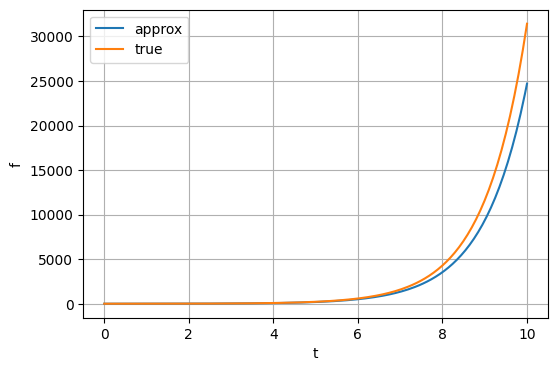

In [16]:
def dfdt(f):
  return f

t_start=0.0
t_end=10.0
n_points=200
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f_approx = np.full_like(t, f0)
f_true=np.full_like(t,f0)

for t_index in range(1,n_points):
  f_approx[t_index]=f_approx[t_index-1]+delta*dfdt(f_approx[t_index-1])
  f_true[t_index]=f_true[0]*np.exp(t_index*delta)

plt.figure(figsize=(6, 4))
plt.plot(t, f_approx,label="approx")
plt.plot(t, f_true,label="true")
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.grid(True)
plt.show()

_____
Next going back to the code without the exact solution, change it so that the differential equation is *df/dt = 10-f*

In [ ]:
def dfdt(f):
  ### add your code here ###
  return ##some value###

t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f = np.full_like(t, f0)

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])

plt.figure(figsize=(6, 4))
plt.plot(t, f)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()

Now we want a `if` statement. To give the syntax look at this:

In [ ]:
f=10
print(f)
if f>5:
  f=0
print(f)

Lets add an if statement so that whenever `f` exceeds `threshold=5.0` it resets to 1.5. We will repeat some parts of the code needlessly, the notebook does remember stuff from earlier cells, but it is nice to keep it all together.

In [ ]:
def dfdt(f):
### add your code here ###

t_start=0.0
t_end=10.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
f0 = 1.5
f = np.full_like(t, f0)
threshold=5.0 # note that I've added this

for t_index in range(1,n_points):
  f[t_index]=f[t_index-1]+delta*dfdt(f[t_index-1])
  # use an if to check if f[t_index] is bigger than threshold
  # and if it is, reset it to f0

plt.figure(figsize=(6, 4))
plt.plot(t, f)
plt.xlabel('t')
plt.ylabel('f')
plt.grid(True)
plt.show()

Next we want to start setting up a neuronal simulator. First lets set some values, as noted above, when you are writing code it is useful to avoid "hard coding", that is writing numbers directly into the code, it can make it difficult to change values later. We are going to be simulating the differential equation 
$$\tau \frac{dV}{dt} = E_l + RI - V$$ 
where we are using `el` for the leak $E_l$, `ri` for the input $RI$ including the resistance and `tau`
for the timescale $\tau$. Basically, you want sensible names for the variables, that look a bit like the actual mathematics but don't have subscripts and so on and it is a good habit not to have variable names starting with a capital, when you are writing code it is good to save "starts with a capital" for special occasions. 

So here you are going to write down what $dv/dt$ is in the function `diff_eq(v,ri, el, tau)` just as you wrote down what `dfdt(f)` was in the programmes above.

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

el = -70  # mV, resting potential
vt = -55  # mV, threshold voltage
tau = 10  # ms, membrane time constant
ri = 12  # mV, different values of R_m * I_e

t_start=0.0
t_end=100.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
v0 = el
v=np.full_like(t, v0)

def diff_eq(v, ri, el, tau):
    return #TODO - add the differential equation here

for t_index in range(1,n_points):
    v[t_index]=v[t_index-1]+delta * diff_eq(v[t_index-1],ri,el,tau)
    if v[t_index]>vt:
        v[t_index]=el

plt.figure(figsize=(6, 4))
plt.plot(t, v)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.grid(True)
plt.show()


This neuron doesn't spike, it doesn't get enough input,you should try changing the ri value to 16 as well, then it does spike!
_____

As a final nicety, in this code I show how we might put a star for each spike, in my code there is just a line that climbs but resets whenever it reaches f=0.9. You can go back to the code above to add the stars at each spike. Note the `foo.append(val)` command appends `val` to the list `foo` so in the programme I am just add the spike times to what starts out as an empty list, I make the empty list using `reset_times=[]`.


In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

el = -70  # mV, resting potential
vt = -55  # mV, threshold voltage
tau = 10  # ms, membrane time constant
ri = 16  # mV, different values of R_m * I_e

t_start=0.0
t_end=100.0
n_points=1000
delta=(t_end-t_start)/n_points

t=np.linspace(t_start,t_end,n_points)
v0 = el
v=np.full_like(t, v0)
reset_times=[]


def diff_eq(v, ri, el, tau):
    return ##TODO - add equation

for t_index in range(1,n_points):
    v[t_index]=v[t_index-1]+delta * diff_eq(v[t_index-1],ri,el,tau)
    if v[t_index]>vt:
        v[t_index]=el
        reset_times.append(t[t_index])

plt.figure(figsize=(6, 4))
plt.plot(t, v)
for reset_time in reset_times:
    plt.plot(reset_time, -50, 'r*', markersize=10)
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')
plt.grid(True)
plt.show()

Now if you want to try something harder, have counter to count how many spikes there are! So start out with a spike number variable `spike_n=0` and every time there is a spike instead of adding the time to list add one to `spike_n` and, at the end, instead of making a graph, just print out `spike_n`. If the time 